In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [38]:
df.shape

(303, 14)

#### Data Description 
 	 	attribute	 	description	
1.	 	age: 	 	Age in years	
2.	 	sex: 	 	Female or male	
3.	 	cp: 	 	Chest pain type (typical angina, atypical angina, non-angina, or asymptomatic angina)	
4.	 	trestbps: 	 	Resting blood pressure (mm Hg)	c
5.	 	chol: 	 	Serum cholesterol (mg/dl)	
6.	 	fbs:  	Fasting blood sugar (< 120 mg/dl or > 120 mg/dl)	
7.	 	restecg:  	Resting electrocardiography results (normal, ST-T wave abnormality, or left ventricular hypertrophy)	
8.	 	thalach: 	 	Max. heart rate achieved during thalium stress test	
9.	 	exang: 	 	Exercise induced angina (yes or no)	
10.	 	oldpeak: 	 	ST depression induced by exercise relative to rest	
11.	 	slope: 	 	Slope of peak exercise ST segment (upsloping, flat, or downsloping)	
12.	 	ca: 	 	Number of major vessels colored by fluoroscopy	
13.	 	thal: 	 	Thalium stress test result (normal, fixed defect, or reversible defect)	
14.	 	num:  	Heart disease status: number of major vessels with >50% narrowing (0,1,2,3, or 4)	

In [35]:
#Checking number of unique attributes in each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [63]:
#distributing all the variables in continues & categorical
df_continues_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_categorical_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' , 'thal']

In [42]:
#dropping duplicate rows(if any)
df = df.drop_duplicates()

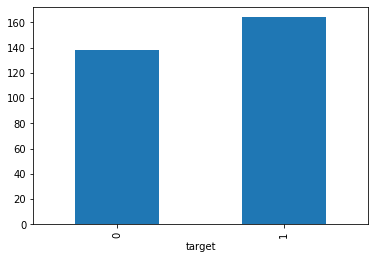

In [62]:
#Observing data distribution of the target variable 
df.groupby('target').size().plot(kind= 'bar')

- Data has distributed 

#### Binning in respect to age

In [84]:
labels = ['26-35', '36-45', '46-55', '56-65', '66+']
bins = [25,36,46,56,66,120]

In [85]:
df['agerange'] = pd.cut(df['age'],bins, labels= labels,include_lowest = True)

In [118]:
#appending the new feature in the category list earlier created
df_categorical_var.append("agerange")

#### Doing crosstab between target variable and other categorical variables 

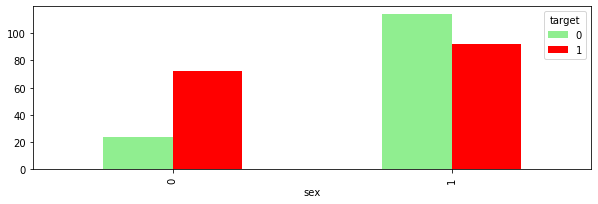

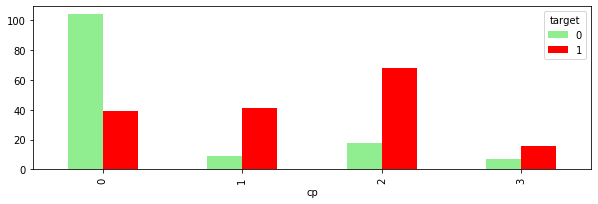

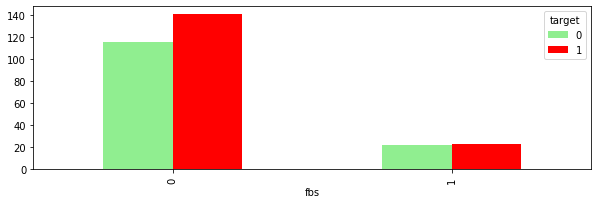

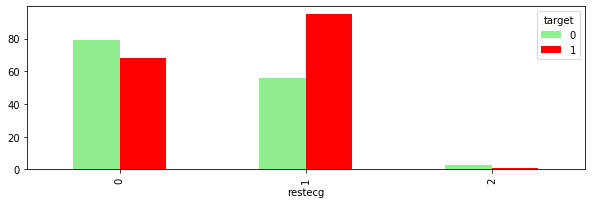

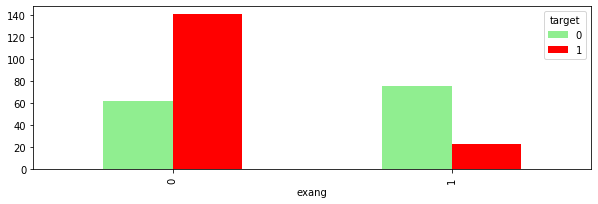

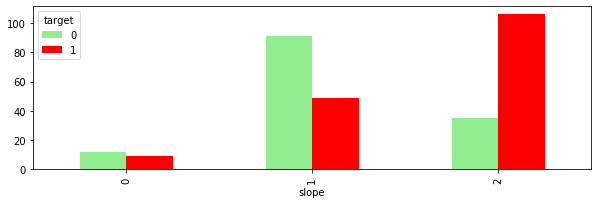

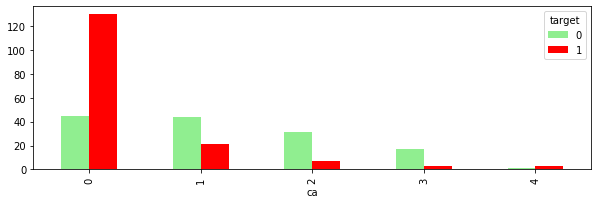

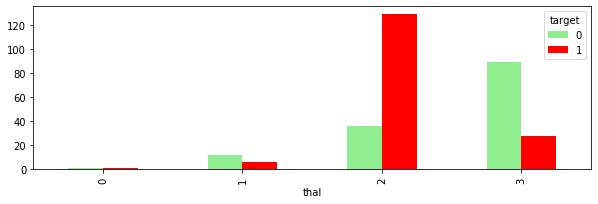

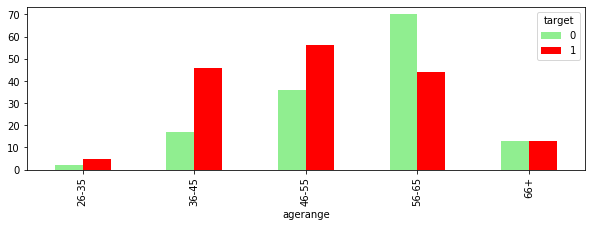

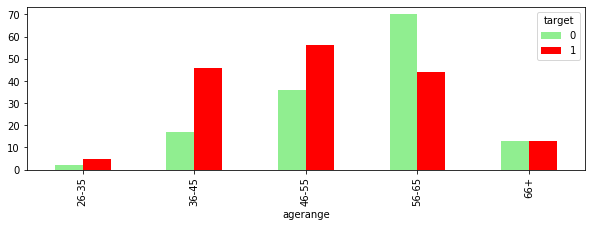

In [125]:
for i in df_categorical_var:
    crosstab = pd.crosstab(index=df[i], columns=df['target'])
    crosstab.plot.bar(figsize=(10,3), color=['lightgreen','red'])
    #print(crosstab, '\n############################')